# Table of Contents
Underconstruction

 <p><div class="lev1 toc-item">
    <a href="#Libraries" data-toc-modified-id="Libraries"><span class="toc-item-num">0&nbsp;&nbsp;Libraries</a></div><div class="lev2 toc-item">
    <a href="#Example-sintle-molecule" data-toc-modified-id="Example-sintle-molecule-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example single molecule</a></div><div class="lev2 toc-item">
    </div>
 

# Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem 
from rdkit.Chem import Draw,PandasTools
from rdkit.Chem import DataStructs
from rdkit.Chem import PyMol

from IPython.core.display import  display, SVG

from os import listdir
from os.path import isfile, join


from xyz2mol import xyz2mol, read_xyz_file
import py3Dmol
import pylab
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

ImportError: No module named matplotlib.pyplot

# Some random functions

In [2]:
__ATOM_LIST__ = [ x.strip() for x in ['h ','he', \
      'li','be','b ','c ','n ','o ','f ','ne', \
      'na','mg','al','si','p ','s ','cl','ar', \
      'k ','ca','sc','ti','v ','cr','mn','fe','co','ni','cu', \
      'zn','ga','ge','as','se','br','kr', \
      'rb','sr','y ','zr','nb','mo','tc','ru','rh','pd','ag', \
      'cd','in','sn','sb','te','i ','xe', \
      'cs','ba','la','ce','pr','nd','pm','sm','eu','gd','tb','dy', \
      'ho','er','tm','yb','lu','hf','ta','w ','re','os','ir','pt', \
      'au','hg','tl','pb','bi','po','at','rn', \
      'fr','ra','ac','th','pa','u ','np','pu']]
                 
def xyztopy3dmol_input(atomicNumList,charge,xyz_coordinates):
    n = len(atomicNumList)
    input_str = "%d\n"%n
    input_str = "%s charge=%d"%(input_str,int(charge))
    for i in range(n):
        input_str = "%s\n "%(input_str)
        #input_str = "%s%s   %f   %f   %f"%(input_str,__ATOM_LIST__[atomicNumList[i]],1.8893*xyz_coordinates[i][0],1.8893*xyz_coordinates[i][1],1.8893*xyz_coordinates[i][2])
        input_str = "%s%s   %f   %f   %f"%(input_str,__ATOM_LIST__[atomicNumList[i]],xyz_coordinates[i][0],xyz_coordinates[i][1],xyz_coordinates[i][2])
    return input_str  

# Data set overview


We are using the data set DB9 (check the name) which includes all molecules with up to 9 of the following atoms C,N,O,F.

In order to use it as a data set, we need to find an appropriate way to represent features, we propose the following workflow.

1 -  XYZ
The information of the dataset comes in xyz coordinates, they are 3D cartesian coordinates that describes the position of the atoms in the molecule. 
 * Function to import xyz file


2 - SMILES
It contains information about the conectivity of the molecule.

- Function to translate xyz to SMILES (rdkit)

3 - Matrix form of smiles
In order to use smiles as features, for example if we expect smiles with a maximum lenght of n and with m different characters the matrix of features will be a matrix $R^{n\times m}$. For example lets 

# Data set

Getting the names of all files in the folder gdb9

In [3]:
folder = "../gdb9/"
onlyfiles = ["%s%s"%(folder,f) for f in listdir(folder) if isfile(join(folder, f))]
print("Number of molecules in dataset %d"%len(onlyfiles))

Number of molecules in dataset 133886


# XYZ molecule
## A single molecule

In [4]:
xyz_filename =  onlyfiles[100]# just the 10 molecules

In [5]:
## Just for fun let's see how they are arranged
atomicNumList,charge,xyz_coordinates, charged_fragments= read_xyz_file(xyz_filename)
print(np.array(type(xyz_coordinates[0][0])))
xyz = xyztopy3dmol_input(atomicNumList,charge,xyz_coordinates)

xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(xyz,'xyz',{'vibrate': {'frames':10,'amplitude':1}})
xyzview.setStyle({'stick':{}})
xyzview.setBackgroundColor('0xeeeeee')
xyzview.animate({'loop': 'backAndForth'})
xyzview.zoomTo()
xyzview.show()


<type 'float'>


# Smiles

To obtain the molecule represented as SMILES, we need to convert the xyz coordinates in a SMILES string.

In [6]:
quick = False
mol = xyz2mol(atomicNumList, charge, np.array(xyz_coordinates), charged_fragments, quick)

We will use rdkit to draw and process SMILES.

In [7]:
AllChem.MolToSmiles(mol)
mol = AllChem.rdmolops.RemoveHs(mol)

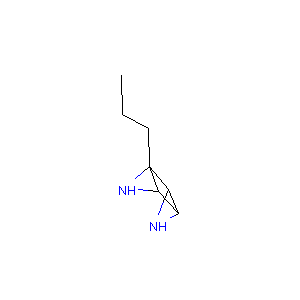

In [8]:
Draw.MolToImage(mol)    

# All files set

In [9]:
#class Molecule(AllChem):
def get_molecule_set(files):
    """This function returns a list of mol objects based on a list of xyzs
    todo: it might help if it is a Pandas Data frame"""
    molecules_set = []
    for i, tape in enumerate(files):
        print(i,tape)
        atomicNumList,charge,xyz_coordinates, charged_fragments= read_xyz_file(tape)
        mol = xyz2mol(atomicNumList, charge, np.array(xyz_coordinates), charged_fragments, quick)
        #mol = AllChem.rdmolops.RemoveHs(mol)
        molecules_set.append(mol)
    return molecules_set
        

In [10]:
# Now we have a list of smiles
smiles_set = get_molecule_set(onlyfiles[:1200]) ## I need to end cleaning the data
n_smiles = len(smiles_set)

(0, '../gdb9/dsgdb9nsd_035176.xyz')
(1, '../gdb9/dsgdb9nsd_131462.xyz')
(2, '../gdb9/dsgdb9nsd_073123.xyz')
(3, '../gdb9/dsgdb9nsd_096811.xyz')
(4, '../gdb9/dsgdb9nsd_100867.xyz')
(5, '../gdb9/dsgdb9nsd_063330.xyz')
(6, '../gdb9/dsgdb9nsd_089931.xyz')
(7, '../gdb9/dsgdb9nsd_121671.xyz')
(8, '../gdb9/dsgdb9nsd_025365.xyz')
(9, '../gdb9/dsgdb9nsd_065999.xyz')
(10, '../gdb9/dsgdb9nsd_032619.xyz')
(11, '../gdb9/dsgdb9nsd_044957.xyz')
(12, '../gdb9/dsgdb9nsd_055682.xyz')
(13, '../gdb9/dsgdb9nsd_002902.xyz')
(14, '../gdb9/dsgdb9nsd_033507.xyz')
(15, '../gdb9/dsgdb9nsd_075552.xyz')
(16, '../gdb9/dsgdb9nsd_045491.xyz')
(17, '../gdb9/dsgdb9nsd_034268.xyz')
(18, '../gdb9/dsgdb9nsd_128133.xyz')
(19, '../gdb9/dsgdb9nsd_065741.xyz')
(20, '../gdb9/dsgdb9nsd_074894.xyz')
(21, '../gdb9/dsgdb9nsd_127200.xyz')
(22, '../gdb9/dsgdb9nsd_023714.xyz')
(23, '../gdb9/dsgdb9nsd_124709.xyz')
(24, '../gdb9/dsgdb9nsd_038452.xyz')
(25, '../gdb9/dsgdb9nsd_066248.xyz')
(26, '../gdb9/dsgdb9nsd_009857.xyz')
(27, '../gd

(233, '../gdb9/dsgdb9nsd_049297.xyz')
(234, '../gdb9/dsgdb9nsd_066274.xyz')
(235, '../gdb9/dsgdb9nsd_079354.xyz')
(236, '../gdb9/dsgdb9nsd_105923.xyz')
(237, '../gdb9/dsgdb9nsd_093955.xyz')
(238, '../gdb9/dsgdb9nsd_082680.xyz')
(239, '../gdb9/dsgdb9nsd_059084.xyz')
(240, '../gdb9/dsgdb9nsd_076067.xyz')
(241, '../gdb9/dsgdb9nsd_030032.xyz')
(242, '../gdb9/dsgdb9nsd_037985.xyz')
(243, '../gdb9/dsgdb9nsd_018966.xyz')
(244, '../gdb9/dsgdb9nsd_026650.xyz')
(245, '../gdb9/dsgdb9nsd_122344.xyz')
(246, '../gdb9/dsgdb9nsd_060605.xyz')
(247, '../gdb9/dsgdb9nsd_102094.xyz')
(248, '../gdb9/dsgdb9nsd_077379.xyz')
(249, '../gdb9/dsgdb9nsd_006580.xyz')
(250, '../gdb9/dsgdb9nsd_029563.xyz')
(251, '../gdb9/dsgdb9nsd_070416.xyz')
(252, '../gdb9/dsgdb9nsd_132157.xyz')
(253, '../gdb9/dsgdb9nsd_036443.xyz')
(254, '../gdb9/dsgdb9nsd_082858.xyz')
(255, '../gdb9/dsgdb9nsd_068259.xyz')
(256, '../gdb9/dsgdb9nsd_016793.xyz')
(257, '../gdb9/dsgdb9nsd_039770.xyz')
(258, '../gdb9/dsgdb9nsd_048189.xyz')
(259, '../gd

(487, '../gdb9/dsgdb9nsd_057056.xyz')
(488, '../gdb9/dsgdb9nsd_050739.xyz')
(489, '../gdb9/dsgdb9nsd_112278.xyz')
(490, '../gdb9/dsgdb9nsd_048176.xyz')
(491, '../gdb9/dsgdb9nsd_067195.xyz')
(492, '../gdb9/dsgdb9nsd_047245.xyz')
(493, '../gdb9/dsgdb9nsd_105704.xyz')
(494, '../gdb9/dsgdb9nsd_093772.xyz')
(495, '../gdb9/dsgdb9nsd_001210.xyz')
(496, '../gdb9/dsgdb9nsd_017472.xyz')
(497, '../gdb9/dsgdb9nsd_049268.xyz')
(498, '../gdb9/dsgdb9nsd_038491.xyz')
(499, '../gdb9/dsgdb9nsd_113166.xyz')
(500, '../gdb9/dsgdb9nsd_085110.xyz')
(501, '../gdb9/dsgdb9nsd_051427.xyz')
(502, '../gdb9/dsgdb9nsd_060822.xyz')
(503, '../gdb9/dsgdb9nsd_026877.xyz')
(504, '../gdb9/dsgdb9nsd_009894.xyz')
(505, '../gdb9/dsgdb9nsd_018741.xyz')
(506, '../gdb9/dsgdb9nsd_041634.xyz')
(507, '../gdb9/dsgdb9nsd_095303.xyz')
(508, '../gdb9/dsgdb9nsd_103375.xyz')
(509, '../gdb9/dsgdb9nsd_007661.xyz')
(510, '../gdb9/dsgdb9nsd_076098.xyz')
(511, '../gdb9/dsgdb9nsd_028682.xyz')
(512, '../gdb9/dsgdb9nsd_039957.xyz')
(513, '../gd

(709, '../gdb9/dsgdb9nsd_005062.xyz')
(710, '../gdb9/dsgdb9nsd_101576.xyz')
(711, '../gdb9/dsgdb9nsd_097500.xyz')
(712, '../gdb9/dsgdb9nsd_043037.xyz')
(713, '../gdb9/dsgdb9nsd_094009.xyz')
(714, '../gdb9/dsgdb9nsd_124906.xyz')
(715, '../gdb9/dsgdb9nsd_077392.xyz')
(716, '../gdb9/dsgdb9nsd_029588.xyz')
(717, '../gdb9/dsgdb9nsd_058371.xyz')
(718, '../gdb9/dsgdb9nsd_057042.xyz')
(719, '../gdb9/dsgdb9nsd_009658.xyz')
(720, '../gdb9/dsgdb9nsd_115503.xyz')
(721, '../gdb9/dsgdb9nsd_083575.xyz')
(722, '../gdb9/dsgdb9nsd_011017.xyz')
(723, '../gdb9/dsgdb9nsd_067181.xyz')
(724, '../gdb9/dsgdb9nsd_016778.xyz')
(725, '../gdb9/dsgdb9nsd_048162.xyz')
(726, '../gdb9/dsgdb9nsd_001204.xyz')
(727, '../gdb9/dsgdb9nsd_093766.xyz')
(728, '../gdb9/dsgdb9nsd_105710.xyz')
(729, '../gdb9/dsgdb9nsd_047251.xyz')
(730, '../gdb9/dsgdb9nsd_051433.xyz')
(731, '../gdb9/dsgdb9nsd_085104.xyz')
(732, '../gdb9/dsgdb9nsd_113172.xyz')
(733, '../gdb9/dsgdb9nsd_038485.xyz')
(734, '../gdb9/dsgdb9nsd_017466.xyz')
(735, '../gd

(938, '../gdb9/dsgdb9nsd_113628.xyz')
(939, '../gdb9/dsgdb9nsd_020590.xyz')
(940, '../gdb9/dsgdb9nsd_051369.xyz')
(941, '../gdb9/dsgdb9nsd_124084.xyz')
(942, '../gdb9/dsgdb9nsd_049526.xyz')
(943, '../gdb9/dsgdb9nsd_123933.xyz')
(944, '../gdb9/dsgdb9nsd_019311.xyz')
(945, '../gdb9/dsgdb9nsd_016022.xyz')
(946, '../gdb9/dsgdb9nsd_048638.xyz')
(947, '../gdb9/dsgdb9nsd_050077.xyz')
(948, '../gdb9/dsgdb9nsd_084540.xyz')
(949, '../gdb9/dsgdb9nsd_112536.xyz')
(950, '../gdb9/dsgdb9nsd_115259.xyz')
(951, '../gdb9/dsgdb9nsd_057718.xyz')
(952, '../gdb9/dsgdb9nsd_009102.xyz')
(953, '../gdb9/dsgdb9nsd_000898.xyz')
(954, '../gdb9/dsgdb9nsd_102725.xyz')
(955, '../gdb9/dsgdb9nsd_094753.xyz')
(956, '../gdb9/dsgdb9nsd_085886.xyz')
(957, '../gdb9/dsgdb9nsd_040264.xyz')
(958, '../gdb9/dsgdb9nsd_006231.xyz')
(959, '../gdb9/dsgdb9nsd_026687.xyz')
(960, '../gdb9/dsgdb9nsd_009664.xyz')
(961, '../gdb9/dsgdb9nsd_083549.xyz')
(962, '../gdb9/dsgdb9nsd_037952.xyz')
(963, '../gdb9/dsgdb9nsd_122393.xyz')
(964, '../gd

(1152, '../gdb9/dsgdb9nsd_075744.xyz')
(1153, '../gdb9/dsgdb9nsd_055494.xyz')
(1154, '../gdb9/dsgdb9nsd_120779.xyz')
(1155, '../gdb9/dsgdb9nsd_062238.xyz')
(1156, '../gdb9/dsgdb9nsd_088839.xyz')
(1157, '../gdb9/dsgdb9nsd_086814.xyz')
(1158, '../gdb9/dsgdb9nsd_110862.xyz')
(1159, '../gdb9/dsgdb9nsd_063126.xyz')
(1160, '../gdb9/dsgdb9nsd_121467.xyz')
(1161, '../gdb9/dsgdb9nsd_025173.xyz')
(1162, '../gdb9/dsgdb9nsd_126308.xyz')
(1163, '../gdb9/dsgdb9nsd_064649.xyz')
(1164, '../gdb9/dsgdb9nsd_044599.xyz')
(1165, '../gdb9/dsgdb9nsd_035360.xyz')
(1166, '../gdb9/dsgdb9nsd_131674.xyz')
(1167, '../gdb9/dsgdb9nsd_099934.xyz')
(1168, '../gdb9/dsgdb9nsd_073335.xyz')
(1169, '../gdb9/dsgdb9nsd_068073.xyz')
(1170, '../gdb9/dsgdb9nsd_036669.xyz')
(1171, '../gdb9/dsgdb9nsd_047090.xyz')
(1172, '../gdb9/dsgdb9nsd_067340.xyz')
(1173, '../gdb9/dsgdb9nsd_125601.xyz')
(1174, '../gdb9/dsgdb9nsd_021315.xyz')
(1175, '../gdb9/dsgdb9nsd_078260.xyz')
(1176, '../gdb9/dsgdb9nsd_009499.xyz')
(1177, '../gdb9/dsgdb9nsd

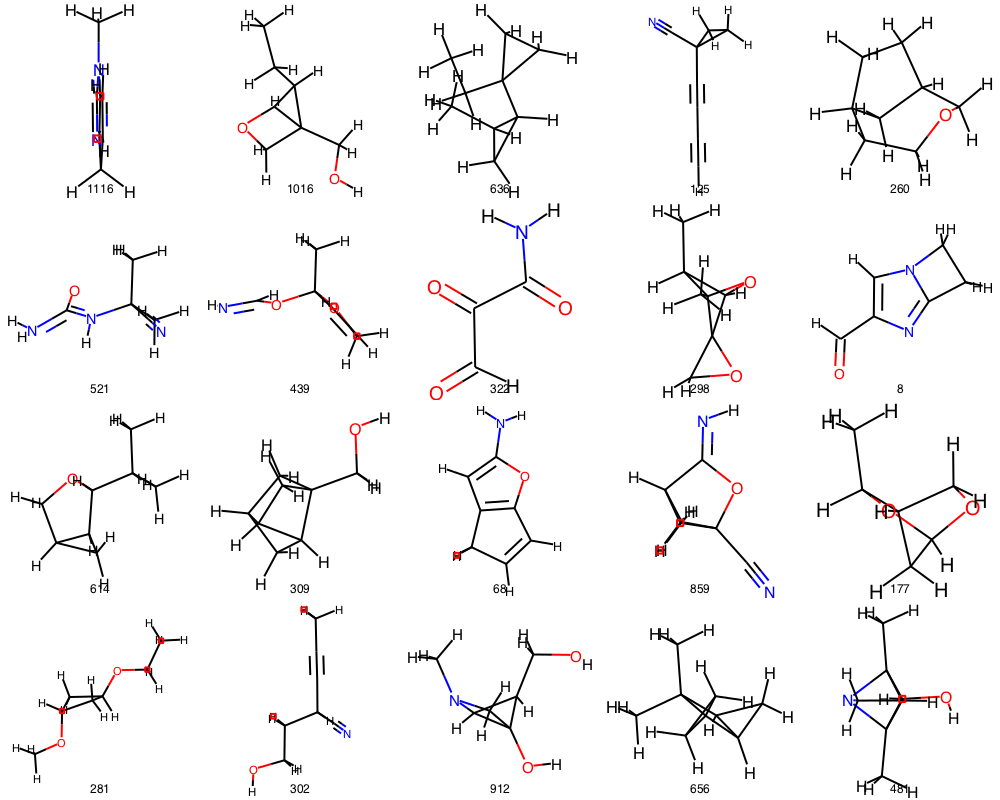

In [11]:
#### Just for fun, lets print some random
# I need to clean up further the structures
# generate some integers
random_samples = np.random.randint(0,n_smiles,20)
labels_random_samples = [str(i) for i in random_samples]
random_smiles = [smiles_set[integer] for integer in random_samples]

Draw.MolsToGridImage(
        random_smiles, legends= labels_random_samples, molsPerRow=5)

# Coding matrix of one hot vector

In [65]:

class Molecule_info(object):
    def __init__(self,file_name):
        self.file_name = file_name
        self.mol = self.get_mol_rdkit()
        self.smile = self.get_smile()
        self.uniquechar = list(set(self.smile))
        self.max_length = len(self.smile)
        print(self.smile)
        pass
    
    def get_mol_rdkit(self):
        atomicNumList,charge,xyz_coordinates, charged_fragments= read_xyz_file(self.file_name)
        mol = xyz2mol(atomicNumList, charge, np.array(xyz_coordinates), charged_fragments, quick) 
        return mol
    
    def get_smile(self):
        return Chem.MolToSmiles(self.mol)
    
    def get_feature_mat(self,dict_char,n,m):
        """ """
        bool_matrix = np.zeros((m,n),dtype=np.bool)
        for i,letter in enumerate(self.smile):
            bool_matrix[i,dict_char[letter]] = True
        bool_matrix[n:,:] = True ## this is a dummy letter to have matrices with the same size 
                                  ## (like adding spaces)
        return bool_matrix
            
        
def get_parameters_feature_mat(mols_info_set):
    """This function find unique characters inside of an smile
    and the maximum number of cols"""
    mol = mols_info_set[0]
    uniquechar = mol.uniquechar
    max_lenght = mol.max_length
    for mol in mols_info_set[1:]:
        uniquechar = uniquechar + mol.uniquechar
        uniquechar  = list(set(uniquechar ))
        max_lenght = max(max_lenght, mol.max_length)
    
    
    """This function creates a dictionary that contains the row id for a char"""
    dict_char = {}
    for i, char in enumerate(uniquechar):
        dict_char[char] = i
    dict_char["_"] = i  
    n_char = len(uniquechar) # The one is a dummy variable to fill spaces

    return dict_char,n_char,max_lenght


def get_smiles_from_feature(matrix,dict_char):
    n,m = np.shape(matrix)
    smile = []
    for i in range(n):
        matrix[n]


In [66]:
mols_set_info = [Molecule_info(file_name) for file_name in onlyfiles[:1200]]

[H]N1C([H])(C#N)C12C1([H])C([H])([H])C2([H])C1([H])[H]
[H]OC1=NON=C1OC([H])=O
[H]C([H])([H])C12C([H])([H])C([H])([H])C1([H])C([H])([H])N1C([H])([H])C12[H]
[H]N([H])C1([H])C(=NC([H])([H])[H])OC(=O)C1([H])[H]
[H]OC([H])([H])C([H])(C#N)C([H])(C([H])([H])[H])C([H])([H])O[H]
[H]N=C1OC(=O)C([H])([H])C1(C([H])([H])[H])C([H])([H])[H]
[H]N1C([H])([H])C2(C#N)N([H])C([H])(C([H])([H])[H])C12[H]
[H]OC([H])([H])C([H])([H])OC(=O)N1C([H])([H])C1([H])[H]
[H]C(=O)C1N=C2N(C=1[H])C([H])([H])C2([H])[H]
[H]N=C1OC([H])([H])C1(N([H])[H])C1([H])N([H])C1([H])[H]
[H]C#CC1=[N]=C([H])[N](=C1[H])C([H])([H])C([H])([H])[H]
[H]C1([H])OC([H])([H])C2([H])OC1([H])C(=O)C2([H])[H]
[H]C([H])([H])C(=O)C([H])([H])C1(C([H])([H])[H])C([H])([H])OC1([H])[H]
[H]C(=O)C1=NC([H])([H])C([H])([H])O1
[H]C1([H])OC1(C#N)C([H])([H])C1([H])C([H])([H])C1([H])[H]
[H]C1=C(C([H])([H])[H])C([H])(C#N)N([H])C([H])([H])C1([H])[H]
[H][N]1=[C](=O)N2C3([H])C([H])([H])C([H])([H])C1([H])C23[H]
[H]C1([H])OC2([H])C3(C#N)OC1([H])C23[H]
[H][N]([H])=C1[N]#[N

[H]C1=[N]=C2C(=NC(=[N]([H])[H])C2([H])[H])O1
[H]C1C2=C(C([H])=[N]([H])C2=[N]([H])[H])C([H])([H])C=1[H]
[H]OC([H])(C([H])([H])C#N)C1([H])C([H])([H])C1([H])O[H]
[H]C1([H])OC2([H])C3=C1N=[N]=[N]3C2([H])[H]
[H]C1([H])OC2([H])C3([H])OC([H])(C3([H])[H])C2([H])C1([H])[H]
[H]C#CC([H])([H])C([H])([H])C([H])(C#C[H])C([H])([H])O[H]
[H]C([H])([H])C1([H])C([H])([H])OC2([H])C3([H])C([H])([H])C21C3([H])[H]
[H]C(=O)OC1([H])C2([H])OC(=O)C12[H]
[H]C#CC([H])([H])C#CC(F)(F)F
[H]N1C2=NC3([H])C4([H])C2([H])C1(C([H])([H])[H])C34[H]
[H]C1([H])OC([H])([H])C12OC21C([H])([H])C([H])([H])C1([H])[H]
[H]C#CC12N([H])C1([H])C1(C([H])([H])[H])C([H])([H])C21[H]
[H]C1([H])OC([H])([H])C2(O1)C([H])([H])C1([H])C([H])([H])C12[H]
[H]C1([H])OC2([H])C([H])([H])C([H])([H])C3([H])C1([H])C23[H]
[H]OC12C([H])([H])C3([H])C4([H])C1([H])C4([H])C32O[H]
[H]C1N=NN(C(=O)C=1F)C([H])([H])[H]
[H]C1C([H])=C([H])C2([H])C3([H])C([H])([H])C2([H])C3([H])C=1[H]
[H]OC1([H])C2([H])OC3([H])C([H])([H])C1([H])C32[H]
[H]OC([H])([H])C([H])(O[H])C1(OC1([H

[H]N=C(N([H])[H])N([H])C1=C([H])C([H])=NN1[H]
[H]C([H])([H])OC12C([H])([H])C(C([H])([H])C([H])([H])[H])(C1([H])[H])C2([H])[H]
[H]N1C(=O)C([H])([H])OC([H])([H])C1([H])[H]
[H]C([H])([H])C12C([H])([H])OC([H])([H])C1([H])C([H])([H])C([H])([H])C2([H])[H]
[H]OC1=NN=C2ON=NN12
[H]OC1=[N]=C([H])C(N=C1F)=[N]([H])[H]
[H]C#CC1(C([H])([H])[H])C([H])([H])C2([H])C([H])([H])C21O[H]
[H]C(=O)C(=O)C(=O)N([H])[H]
[H]C#CC1([H])OC([H])(C([H])([H])C#N)C1([H])[H]
[H][N]1=[C]2=NC([H])([H])C3([H])N(C3([H])[H])C2([H])C1([H])[H]
[H]OC1([H])C([H])=C([H])C2([H])C([H])([H])C1(O[H])C2([H])[H]
[H]C1=C(C#N)C(N=[N]1[H])=[N]([H])[H]
[H]C1OC(=C(C=1[H])C([H])([H])[H])N(C([H])([H])[H])C([H])([H])[H]
[H]C([H])([H])N1C([H])([H])C([H])(OC([H])(C([H])([H])[H])C([H])([H])[H])C1([H])[H]
[H]C([H])([H])C([H])([H])OC([H])([H])C1([H])C([H])([H])C([H])(C([H])([H])[H])C1([H])[H]
[H]C([H])([H])C([H])([H])C1([H])OC1([H])C1([H])OC1([H])C([H])([H])[H]
[H]OC1([H])C([H])([H])C(C([H])([H])[H])(C([H])([H])[H])C1(O[H])C([H])([H])[H]
[H]C([H])([

[H]C1=NC2([H])C([H])([H])OC([H])(C([H])([H])O1)C2([H])[H]
[H]C([H])([H])C(=O)OC1([H])C([H])([H])C1([H])C([H])([H])[H]
[H]C1=C([H])C2([H])C([H])=C([H])C1([H])C21C([H])([H])C1([H])[H]
[H]N=C1OC(=O)N2C([H])([H])C12[H]
[H]C#CC([H])([H])C([H])(C#C[H])C([H])(C([H])([H])[H])C([H])([H])[H]
[H]OC1([H])C2(N3C([H])([H])C2([H])C31C([H])([H])[H])C([H])([H])[H]
[H]C1N=C2[N](=[N]=1)C1([H])C([H])([H])C21C([H])([H])[H]
[H]N1C(=O)C2([H])C([H])([H])C2(C([H])([H])[H])C1([H])[H]
[H]C1([H])C(=O)C2([H])C3([H])C([H])([H])C2([H])C13[H]
[H]OC1([H])C2([H])OC([H])([H])C1([H])C2([H])C#N
[H]OC([H])([H])C1([H])OC([H])(C([H])([H])O[H])C([H])([H])C1([H])[H]
[H]C([H])([H])C([H])(C#N)N1C([H])([H])C([H])([H])C1([H])C([H])([H])[H]
[H]C(=O)C1([H])C(=O)OC([H])([H])OC1([H])[H]
[H]OC([H])([H])C1([H])N([H])C(=O)C1([H])OC([H])([H])[H]
[H]C#CC([H])([H])C([H])([H])N([H])C(=N[H])C([H])=O
[H]C([H])([H])C12N3C([H])([H])C1([H])C([H])(C#N)C32[H]
[H]C1C([H])=C([H])C([H])([H])N([H])C(=O)N([H])C=1[H]
[H]N=C([H])OC([H])([H])C1(C([H])([H])

[H]N=C([H])OC(=O)C1([H])C([H])([H])C1([H])O[H]
[H]OC12C([H])([H])OC([H])([H])C1([H])OC([H])([H])C2([H])[H]
[H]C([H])([H])C1([H])C([H])([H])C1(C#CC#N)C([H])([H])[H]
[H]C([H])([H])C([H])([H])C1([H])C2([H])C([H])([H])OC1(C([H])([H])[H])C2([H])[H]
[H]N1C([H])([H])C1(C#N)C([H])([H])C#CC([H])([H])[H]
[H]C1([H])OC([H])([H])C(O1)(C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])[H]
[H]C(=O)[N]1=C([O])OC([H])([H])C1([H])[H]
[H]C#CC1([H])C2([H])C([H])([H])C([H])([H])C12[H]
[H]C([H])([H])C1([H])N(C([H])([H])C([H])([H])C2([H])OC2([H])[H])C1([H])[H]
[H]C1=C([H])C([H])([H])C2([H])N(C(=O)C2([H])[H])C1([H])[H]
[H]OC1([H])C2([H])OC([H])(OC2=O)C1([H])[H]
[H]C([H])([H])C([H])([H])C12C([H])([H])C([H])([H])C([H])([H])OC1([H])C2([H])[H]
[H]C(=O)C1=C([H])C(=NN1[H])OC([H])([H])[H]
[H]N=C([H])OC([H])([H])C([H])([H])C([H])([H])C#N
[H]C([H])([H])C([H])([H])C12C([H])([H])C([H])([H])C3([H])OC1([H])C32[H]
[H]N1C(=O)C23C([H])([H])C([H])([H])C([H])([H])C12C3([H])[H]
[H]C(=O)C([H])([H])C([H])([H])C(=O)C([H])([H])OC([H]

[H]C#CC12OC1([H])C([H])(C([H])([H])[H])C([H])([H])C2([H])[H]
[H]N1C([H])([H])C1([H])C([H])([H])C([H])(C#N)OC([H])([H])[H]
[H]C([H])([H])OC([H])(C([H])([H])[H])C1([H])OC([H])(C([H])([H])[H])C1([H])[H]
[H]OC1N=C([H])N=C(N=1)C([H])([H])O[H]
[H]N=C1OC2(C#N)C([H])([H])C1([H])C2([H])[H]
[H]C([H])([H])OC([H])([H])C12N(C1([H])[H])C([H])(C([H])([H])[H])C2([H])[H]
[H]C([H])([H])C1([H])C2([H])C([H])([H])C([H])(C#N)C([H])([H])C12[H]
[H]N=C(OC([H])([H])[H])N([H])C([H])=NC([H])([H])C([H])([H])[H]
[H]OC(=O)C1(N([H])[H])C([H])([H])C2([H])C([H])([H])C12[H]
[H]C([H])([H])OC12C([H])([H])N3C1([H])C([H])(C([H])([H])[H])C32[H]
[H]C1=NC(C#[C]=[C]#N)=NO1
[H]OC([H])([H])C1([H])[N](=C([O])C1([H])[H])C([H])([H])[H]
[H]C1=NC([N]([H])=N1)=[N](C([H])([H])[H])C([H])([H])C([H])([H])[H]
[H]OC([H])([H])C1([H])C([H])(C([H])([H])[H])C1(C([H])([H])[H])C([H])([H])O[H]
[H]ON=C(C([H])([H])[H])C([H])([H])C1([H])C([H])([H])OC1([H])[H]
[H]C([H])([H])C1(C([H])([H])[H])C2([H])C([H])([H])C1([H])C2([H])[H]
[H]C1([H])C(=O)C2([H])C3(

[H]OC1([H])C2([H])C([H])([H])C2(O[H])C12N([H])C2([H])[H]
[H]C1([H])C(=O)N2C([H])([H])C2([H])C1([H])C#N
[H]N1[C](=NC([H])(C([H])([H])C#N)C1([H])[H])=[N]([H])[H]
[H]C(=O)C([H])([H])N([H])C1N=C([H])N([H])C=1[H]
[H]N1C([H])(C([H])([H])N2C([H])([H])C2([H])[H])C1(C([H])([H])[H])C([H])([H])[H]
[H][N]1=[C]([O])=[N](C([H])([H])C1([H])[H])C([H])([H])C([H])([H])C([H])([H])[H]
[H]OC1(C#N)C2([H])C([H])([H])C([H])([H])C12N([H])[H]
[H]N=C([H])N(C([H])=O)C(=N[H])N([H])C([H])([H])[H]
[H]OC([H])([H])C([H])([H])C(=NC([H])([H])[H])N([H])C([H])=O
[H]C1C([H])=C(C([H])([H])[H])C([H])([H])C([O])=[N]([H])C=1[H]
[H]N=C1OC([H])=C(N1[H])C([H])([H])C([H])([H])O[H]
[H]OC([H])([H])C12C([H])([H])C([H])=C(C([H])([H])[H])C1([H])C2([H])[H]
[H]C1=C([H])C23OC1([H])C2([H])C([H])([H])C3([H])C([H])([H])[H]
[H]N=C([H])OC1=NOC(=N1)N([H])[H]
[H]ON=C1C([H])([H])C2([H])N([H])C2([H])C1([H])O[H]
[H]C([H])([H])C#CC#CC1([H])OC([H])([H])C1([H])[H]
[H]N=C1OC([H])([H])C1([H])C1(C([H])([H])[H])C([H])([H])C1([H])[H]
[H]OC([H])([H])C([H])(

In [67]:
### It gets the parameters for the features
dict_char,n_char,max_lenght = get_parameters_feature_mat(mols_set_info) 
print("The number of unique characters are %d and the maximum lenght of the string is %d "%(n_char,max_lenght))
print("Then the lengh of the vector is %d"%(n_char*max_lenght))

The number of unique characters are 18 and the maximum lenght of the string is 95 
Then the lengh of the vector is 1710


In [86]:
# For now they are going to be store in vectors, we can store them later as vectors or matrix
def get_features(mols_set_info):
    dict_char,n_char,max_length = get_parameters_feature_mat(mols_set_info) 
    n_samples = len(mols_set_info)
    
    print("The number of unique characters are %d and the maximum lenght of the string is %d "%(n_char,max_length))
    print("Then the lengh of the vector is %d"%(n_char*max_length))
    print("And number of samples is %d"%(n_samples))
    data = np.zeros((n_samples,n_char*max_lenght),dtype=bool)
    for i,mol in enumerate(mols_set_info):
        data[i,:] = np.reshape(mol.get_feature_mat(dict_char,n_char,max_length),n_char*max_lenght)   
    return data

In [93]:
data = get_features(mols_set_info)
print(type(data))

The number of unique characters are 18 and the maximum lenght of the string is 95 
Then the lengh of the vector is 1710
And number of samples is 1200
<type 'numpy.ndarray'>


In [94]:
# For now it is just a csv, we might try to store it with heterogeneus data as xml or depending of the final size
np.savetxt("feature_vector_%d_samples.csv"%len(mols_set_info), data, delimiter=',')